In [1]:
%load_ext watermark
%watermark

Last updated: 2022-02-10T11:46:07.681478-03:00

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 69 Stepping 1, GenuineIntel
CPU cores   : 4
Architecture: 64bit



In [2]:
import pandas as pd

In [3]:
peliculas = pd.read_csv("movies_1.csv")

In [4]:
peliculas.head()

,presupuesto,genero,lenguaje,popularidad,productores,pais,ventas,duracion,titulo,puntuacion,n_votos
0,NaN,Comedy,en,8.387519,Sandollar Productions,United States of America,76578911.0,106.0,Father of the Bride Part II,5.7,173.0
1,NaN,Drama,en,0.894647,Miramax,South Africa,676525.0,106.0,"Cry, the Beloved Country",6.7,13.0
2,3500000.0,Comedy,en,14.569650,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0
3,NaN,Comedy,en,8.963037,Paramount Pictures,United States of America,32.0,87.0,Black Sheep,6.0,124.0
4,12000000.0,Comedy,en,9.592265,Universal Pictures,United States of America,41205099.0,92.0,Happy Gilmore,6.5,767.0


In [5]:
peliculas.genero

0       Comedy
1        Drama
2       Comedy
3       Comedy
4       Comedy
         ...  
1339    Horror
1340       NaN
1341       NaN
1342    Horror
1343       NaN
Name: genero, Length: 1344, dtype: object

## Problema a resolver
Crear un estimador k-means con un número de clusters igual al número de géneros.
Entrenar el modelo y indicar el cluster asignado a cada película.

## Entrega del trabajo
Enviar la solución en formato jupyter-notebook antes de las 13:00 pm del Martes 8 de Febrero al correo juan.mondaca@gmail.com 
Grabar el archivo ipynb con su nombre y apellido.

## Desarrollo del trabajo

Como primera parte del desarrollo de la creación del estimador K-means debemos estudiar la base de datos y realizar una limpieza de ésta.

In [6]:
#Tipos de genero de pelicula
peliculas.genero.unique()

array(['Comedy', 'Drama', 'Documentary', 'Science Fiction', 'Thriller',
       'Animation', 'Adventure', 'Horror', 'Fantasy', 'War', 'Western',
       'Music', 'Romance', 'Action', 'Mystery', nan, 'Crime', 'Family'],
      dtype=object)

In [7]:
#Observamos que tenemos datos tipo NaN en nuestro dataset por lo que buscaremos como tratarlos.Tenemos dos tipos de datos en este DF y en ambos existen datos NaN.Podriamos utilizar la moda para rellenar los datos NaN categoricos y la media para los numéricos pero esto podria provocar una distorción en la predicción que estamos buscando.
peliculas.isnull().sum()

presupuesto    588
genero          51
lenguaje         0
popularidad      0
productores    209
pais            98
ventas         141
duracion         8
titulo           0
puntuacion       0
n_votos          0
dtype: int64

In [8]:
peliculas.shape

(1344, 11)

### Observaciones del DF

1.- Observamos que la mitad de la data tiene datos null en el presupuesto y rellenar todos estos datos con algun valor especifico como la media o 0 o la moda podría generar una distorción en el modelo por lo que descartaremos la variable para el análisis.

2.- En el caso del genero (variable objetivo) tenemos 51 datos con datos NaN o nulos que eliminaremos del dataframe para poder hacer un análisis con certeza de los resultados que obtengamos.

In [9]:
peliculas_2=peliculas.drop(["presupuesto"],axis=1)
peliculas_2

,genero,lenguaje,popularidad,productores,pais,ventas,duracion,titulo,puntuacion,n_votos
0,Comedy,en,8.387519,Sandollar Productions,United States of America,76578911.0,106.0,Father of the Bride Part II,5.7,173.0
1,Drama,en,0.894647,Miramax,South Africa,676525.0,106.0,"Cry, the Beloved Country",6.7,13.0
2,Comedy,en,14.569650,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0
3,Comedy,en,8.963037,Paramount Pictures,United States of America,32.0,87.0,Black Sheep,6.0,124.0
4,Comedy,en,9.592265,Universal Pictures,United States of America,41205099.0,92.0,Happy Gilmore,6.5,767.0
...,...,...,...,...,...,...,...,...,...,...
1339,Horror,en,1.642247,La Luna Entertainment,United States of America,NaN,86.0,The Ouija Experiment 2: Theatre of Death,3.0,25.0
1340,NaN,en,0.352816,NaN,NaN,NaN,11.0,Voyage to the Sky,5.5,2.0
1341,NaN,en,0.110588,NaN,NaN,NaN,86.0,The Anatomy of Hate,5.7,3.0
1342,Horror,en,9.742082,Campbell Grobman Films,United States of America,NaN,90.0,Leatherface,5.7,62.0


In [10]:
peliculas_3=peliculas_2.dropna(subset=["genero"])

In [11]:
peliculas_3.isnull().sum()

genero           0
lenguaje         0
popularidad      0
productores    166
pais            70
ventas         112
duracion         7
titulo           0
puntuacion       0
n_votos          0
dtype: int64

In [12]:
listaproduc=peliculas_3.productores.unique()
len(listaproduc)

603

In [13]:
peliculas_3.shape

(1293, 10)

In [14]:
peliculas_3[peliculas_3["productores"]=="Universal Pictures"]

,genero,lenguaje,popularidad,productores,pais,ventas,duracion,titulo,puntuacion,n_votos
4,Comedy,en,9.592265,Universal Pictures,United States of America,41205099.0,92.0,Happy Gilmore,6.5,767.0
15,Comedy,en,7.653446,Universal Pictures,United States of America,47774193.0,105.0,"To Wong Foo, Thanks for Everything! Julie Newmar",6.3,117.0
25,Drama,en,6.514592,Universal Pictures,United States of America,20079850.0,99.0,Reality Bites,6.5,180.0
39,Fantasy,en,23.636590,Universal Pictures,United States of America,115267375.0,103.0,DragonHeart,6.4,553.0
59,Drama,en,12.252186,Universal Pictures,United States of America,19255967.0,109.0,On Golden Pond,7.3,101.0
93,Comedy,en,8.412203,Universal Pictures,United States of America,31611225.0,115.0,For Richer or Poorer,5.6,43.0
107,Drama,en,14.004074,Universal Pictures,United States of America,128499205.0,161.0,Out of Africa,7.0,290.0
114,Comedy,en,10.107454,Universal Pictures,United States of America,7027290.0,103.0,BASEketball,5.9,150.0
117,Comedy,en,5.873021,Universal Pictures,United States of America,73961419.0,94.0,The Jerk,7.0,272.0
159,Horror,en,7.503126,Universal Pictures,United States of America,1012189.0,72.0,Dracula,7.2,254.0


Observamos de las dos lineas anteriores que tenemos un total de 603 productores distintos no nulos que es la mitad de las observaciones totales. Eliminaremos los datos nulos intentando mantener aprendizaje de nuestro modelo sin interferencias. 

In [15]:
peliculas_4=peliculas_3.dropna(subset=["productores"])

In [16]:
peliculas_4.isnull().sum()

genero          0
lenguaje        0
popularidad     0
productores     0
pais            6
ventas         64
duracion        6
titulo          0
puntuacion      0
n_votos         0
dtype: int64

Finalmente haremos lo mismo con los conjuntos de datos restantes que tienen datos NaN.

In [17]:
peliculas_limpio=peliculas_4.dropna()

In [18]:
peliculas_limpio.shape

(1053, 10)

In [19]:
peliculas_limpio

,genero,lenguaje,popularidad,productores,pais,ventas,duracion,titulo,puntuacion,n_votos
0,Comedy,en,8.387519,Sandollar Productions,United States of America,76578911.0,106.0,Father of the Bride Part II,5.7,173.0
1,Drama,en,0.894647,Miramax,South Africa,676525.0,106.0,"Cry, the Beloved Country",6.7,13.0
2,Comedy,en,14.569650,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0
3,Comedy,en,8.963037,Paramount Pictures,United States of America,32.0,87.0,Black Sheep,6.0,124.0
4,Comedy,en,9.592265,Universal Pictures,United States of America,41205099.0,92.0,Happy Gilmore,6.5,767.0
...,...,...,...,...,...,...,...,...,...,...
1285,Drama,en,3.199976,Touchstone Pictures,United States of America,23042200.0,112.0,The Program,6.0,28.0
1288,Science Fiction,en,7.676017,Rogue Pictures,United States of America,66821036.0,100.0,Skyline,4.7,516.0
1311,Comedy,en,11.219086,Katalyst Films,United States of America,12032983.0,97.0,Spread,5.2,272.0
1314,Comedy,en,11.266569,Eddie Murphy Productions,United States of America,50504655.0,90.0,Eddie Murphy Raw,7.4,106.0


In [20]:
peliculas_limpio.isnull().sum()

genero         0
lenguaje       0
popularidad    0
productores    0
pais           0
ventas         0
duracion       0
titulo         0
puntuacion     0
n_votos        0
dtype: int64

In [21]:
#le damos unos index nuevos y separamos las variables en valores Target 
#y además en variables categoricas y  numericas.
peliculas_limpio.reset_index(inplace=True,drop=True)
peliculas_limpio

,genero,lenguaje,popularidad,productores,pais,ventas,duracion,titulo,puntuacion,n_votos
0,Comedy,en,8.387519,Sandollar Productions,United States of America,76578911.0,106.0,Father of the Bride Part II,5.7,173.0
1,Drama,en,0.894647,Miramax,South Africa,676525.0,106.0,"Cry, the Beloved Country",6.7,13.0
2,Comedy,en,14.569650,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0
3,Comedy,en,8.963037,Paramount Pictures,United States of America,32.0,87.0,Black Sheep,6.0,124.0
4,Comedy,en,9.592265,Universal Pictures,United States of America,41205099.0,92.0,Happy Gilmore,6.5,767.0
...,...,...,...,...,...,...,...,...,...,...
1048,Drama,en,3.199976,Touchstone Pictures,United States of America,23042200.0,112.0,The Program,6.0,28.0
1049,Science Fiction,en,7.676017,Rogue Pictures,United States of America,66821036.0,100.0,Skyline,4.7,516.0
1050,Comedy,en,11.219086,Katalyst Films,United States of America,12032983.0,97.0,Spread,5.2,272.0
1051,Comedy,en,11.266569,Eddie Murphy Productions,United States of America,50504655.0,90.0,Eddie Murphy Raw,7.4,106.0


In [22]:
target=peliculas_limpio.genero
#separaremos los titulos para utilizarlos en el análisis final
titulos=peliculas_limpio.titulo
peliculas_limpio=peliculas_limpio.drop(["genero","titulo"],axis=1)

In [23]:
datos_numericos = peliculas_limpio.select_dtypes(["int64","float64"])
datos_categoricos= peliculas_limpio.select_dtypes([object])

In [24]:
datos_numericos

,popularidad,ventas,duracion,puntuacion,n_votos
0,8.387519,76578911.0,106.0,5.7,173.0
1,0.894647,676525.0,106.0,6.7,13.0
2,14.569650,28215918.0,91.0,7.0,513.0
3,8.963037,32.0,87.0,6.0,124.0
4,9.592265,41205099.0,92.0,6.5,767.0
...,...,...,...,...,...
1048,3.199976,23042200.0,112.0,6.0,28.0
1049,7.676017,66821036.0,100.0,4.7,516.0
1050,11.219086,12032983.0,97.0,5.2,272.0
1051,11.266569,50504655.0,90.0,7.4,106.0


In [25]:
datos_categoricos

,lenguaje,productores,pais
0,en,Sandollar Productions,United States of America
1,en,Miramax,South Africa
2,en,New Line Cinema,United States of America
3,en,Paramount Pictures,United States of America
4,en,Universal Pictures,United States of America
...,...,...,...
1048,en,Touchstone Pictures,United States of America
1049,en,Rogue Pictures,United States of America
1050,en,Katalyst Films,United States of America
1051,en,Eddie Murphy Productions,United States of America


In [26]:
#normalizar los datos numericos
from sklearn.preprocessing import MinMaxScaler

datos_numericos_normalizados = MinMaxScaler().fit_transform(datos_numericos)
datos_numericos_normalizados=pd.DataFrame(datos_numericos_normalizados,columns=datos_numericos.columns)
datos_numericos_normalizados

,popularidad,ventas,duracion,puntuacion,n_votos
0,0.130345,1.251495e-01,0.512077,0.662791,0.035810
1,0.013802,1.105613e-03,0.512077,0.779070,0.002691
2,0.226501,4.611202e-02,0.439614,0.813953,0.106189
3,0.139296,5.066192e-08,0.420290,0.697674,0.025668
4,0.149083,6.733966e-02,0.444444,0.755814,0.158766
...,...,...,...,...,...
1048,0.049659,3.765684e-02,0.541063,0.697674,0.005796
1049,0.119278,1.092026e-01,0.483092,0.546512,0.106810
1050,0.174387,1.966497e-02,0.468599,0.604651,0.056303
1051,0.175125,8.253751e-02,0.434783,0.860465,0.021942


In [27]:
#codificar las variables categoricas
datos_categoricos_codificados=pd.get_dummies(datos_categoricos)
datos_categoricos_codificados

,lenguaje_bn,lenguaje_cn,lenguaje_de,lenguaje_el,lenguaje_en,lenguaje_es,lenguaje_fa,lenguaje_fr,lenguaje_he,lenguaje_hi,...,pais_Serbia,pais_South Africa,pais_South Korea,pais_Spain,pais_Sri Lanka,pais_Sweden,pais_Thailand,pais_Turkey,pais_United Kingdom,pais_United States of America
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1049,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1050,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1051,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
peliculas_procesadas=pd.concat([datos_numericos_normalizados,datos_categoricos_codificados], axis=1)

In [29]:
peliculas_procesadas

,popularidad,ventas,duracion,puntuacion,n_votos,lenguaje_bn,lenguaje_cn,lenguaje_de,lenguaje_el,lenguaje_en,...,pais_Serbia,pais_South Africa,pais_South Korea,pais_Spain,pais_Sri Lanka,pais_Sweden,pais_Thailand,pais_Turkey,pais_United Kingdom,pais_United States of America
0,0.130345,1.251495e-01,0.512077,0.662791,0.035810,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.013802,1.105613e-03,0.512077,0.779070,0.002691,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0.226501,4.611202e-02,0.439614,0.813953,0.106189,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.139296,5.066192e-08,0.420290,0.697674,0.025668,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.149083,6.733966e-02,0.444444,0.755814,0.158766,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.049659,3.765684e-02,0.541063,0.697674,0.005796,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1049,0.119278,1.092026e-01,0.483092,0.546512,0.106810,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1050,0.174387,1.966497e-02,0.468599,0.604651,0.056303,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1051,0.175125,8.253751e-02,0.434783,0.860465,0.021942,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Utilizando Kmeans

In [30]:
target.unique().shape

(17,)

In [31]:
#tenemos 17 generos distintos de peliculas por lo que haremos 17 clusters
from sklearn.cluster import KMeans
peliculas_kmeans=KMeans(n_clusters=17,random_state=2)
peliculas_kmeans.fit(peliculas_procesadas)


KMeans(n_clusters=17, random_state=2)

In [32]:
lclusters=peliculas_kmeans.labels_
lclusters

array([12, 14, 10, ..., 12, 12, 16])

In [33]:
import numpy as np
n_clusters=np.unique(lclusters)
n_clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [34]:
lclusters.shape

(1053,)

In [35]:
#Trabajamos con los datos para generar una tabla con la información obtenida
peliculas_clasif=pd.DataFrame(data=[target,titulos]).T

In [36]:
peliculas_clasif["cluster"]=lclusters

In [37]:
peliculas_clasif=peliculas_clasif[["titulo","genero","cluster"]]
peliculas_clasif

,titulo,genero,cluster
0,Father of the Bride Part II,Comedy,12
1,"Cry, the Beloved Country",Drama,14
2,Friday,Comedy,10
3,Black Sheep,Comedy,0
4,Happy Gilmore,Comedy,7
...,...,...,...
1048,The Program,Drama,12
1049,Skyline,Science Fiction,12
1050,Spread,Comedy,12
1051,Eddie Murphy Raw,Comedy,12


In [38]:
import matplotlib.pyplot as plt

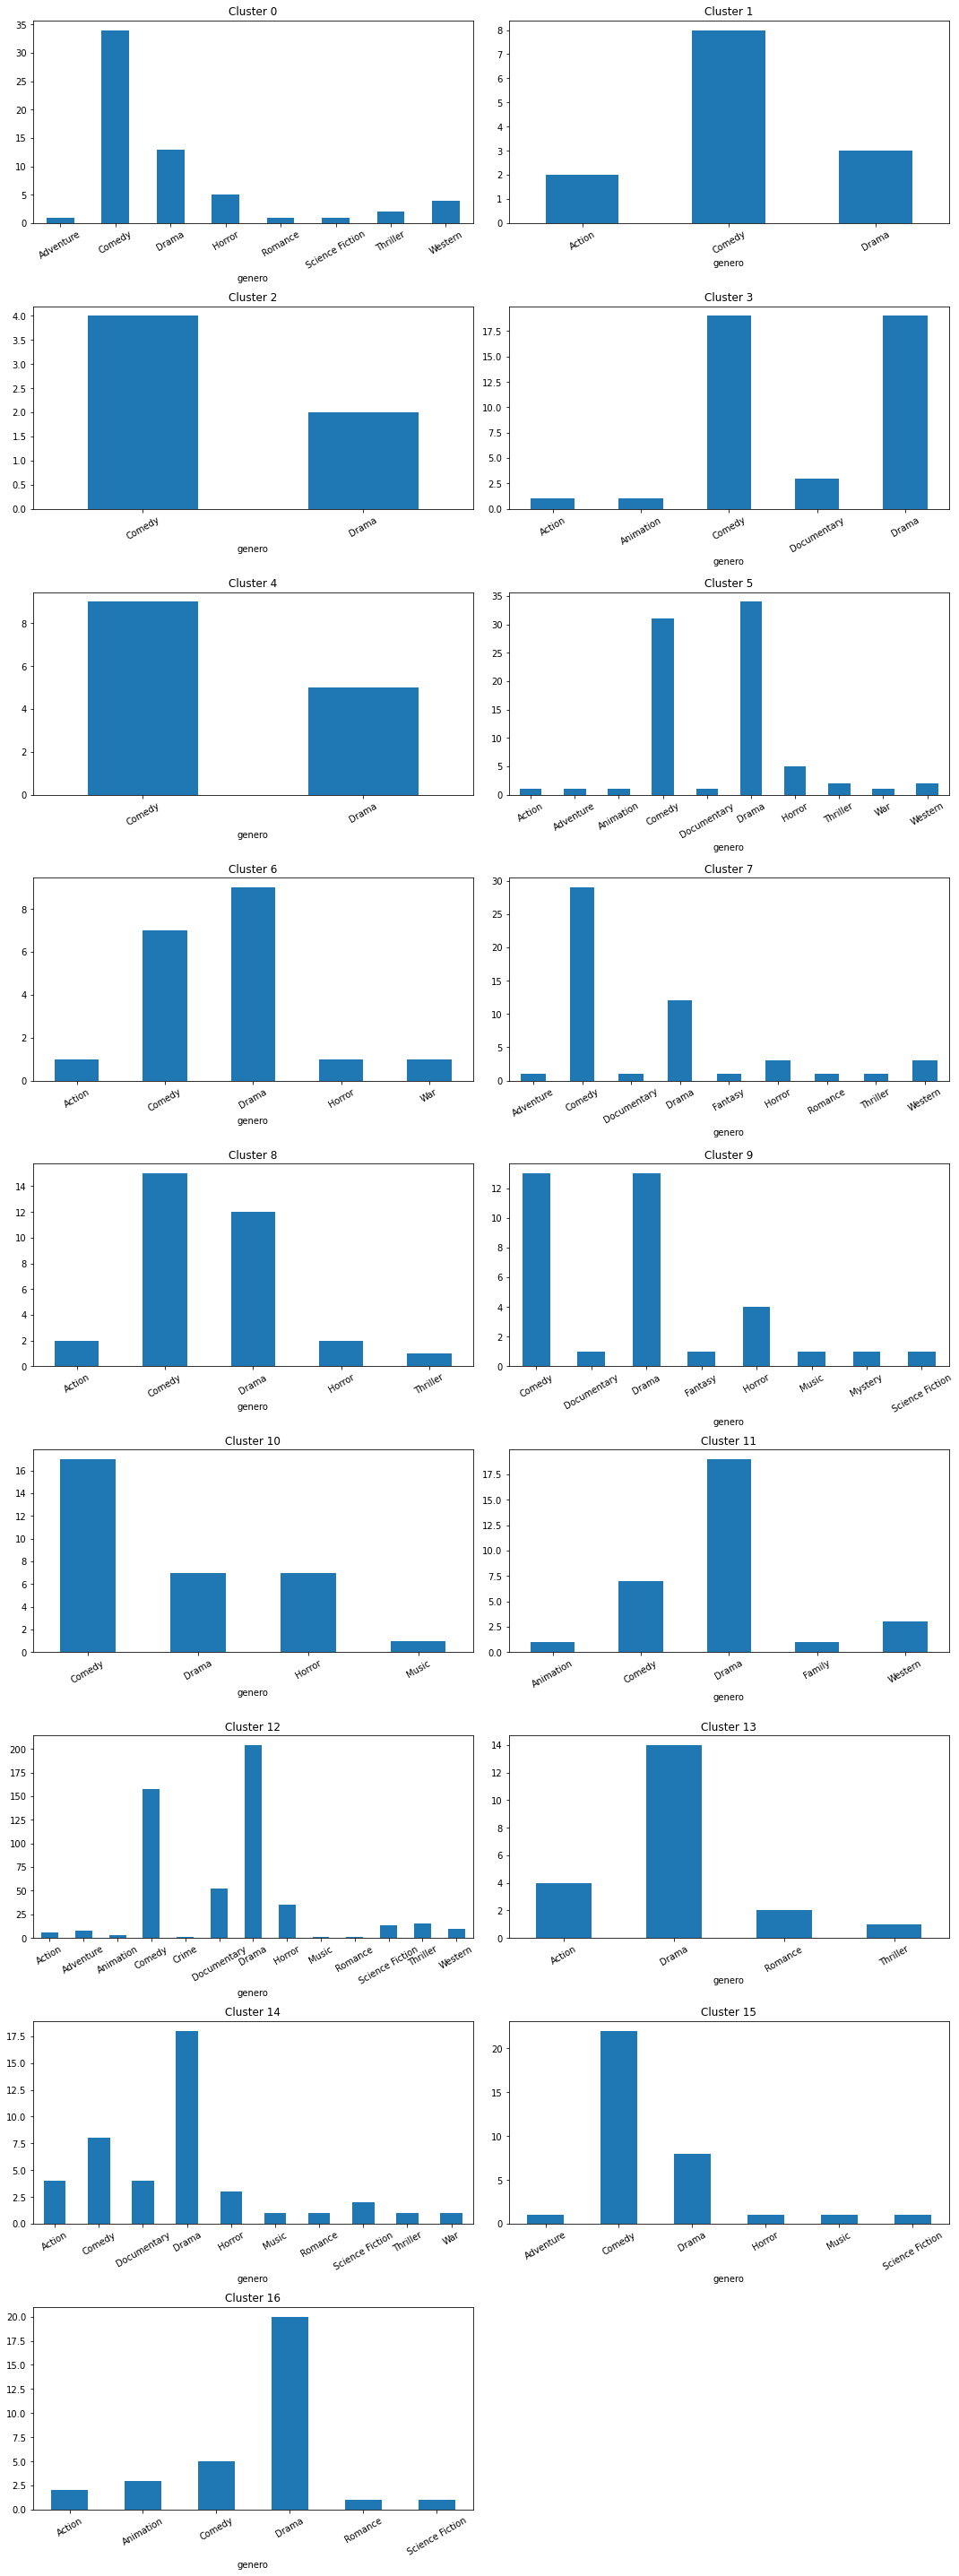

In [39]:
peliculas_analisis=peliculas_clasif.groupby(["cluster","genero"]).count()
fig, ax = plt.subplots(9, 2, figsize=(15,40))
for i in n_clusters:
    plt.subplot(9,2,i+1)
    pd.Series(peliculas_analisis.loc[i]["titulo"]).plot(kind="bar",title="Cluster {}".format(i))
    plt.xticks(rotation=30)
    fig.tight_layout(pad=1.0)
ax[8,1].remove()

Como observamos los clusters generados no son capaces de diferenciar correctamente los datos targets originales donde tenemos clusters que contienen desde 2 valores target hasta 13.

Intentaremos a partir de una limpieza mas profunda de los datos obtener mejores resultados. Para ello eliminaremos las variables categoricas que aparentemente no se condicen con el tipo de peliculas producidas y trabajaremos solo con las numericas.

In [40]:
#solo con variables numericas
peliculas_kmeans_num=KMeans(n_clusters=17,random_state=2)
peliculas_kmeans_num.fit(datos_numericos_normalizados)
lclusters_num=peliculas_kmeans_num.labels_
lclusters_num
n_clusters_num=np.unique(lclusters_num)
peliculas_clasif_num=pd.DataFrame(data=[target,titulos]).T
peliculas_clasif_num["cluster"]=lclusters_num
peliculas_clasif_num

,genero,titulo,cluster
0,Comedy,Father of the Bride Part II,0
1,Drama,"Cry, the Beloved Country",12
2,Comedy,Friday,2
3,Comedy,Black Sheep,1
4,Comedy,Happy Gilmore,11
...,...,...,...
1048,Drama,The Program,5
1049,Science Fiction,Skyline,0
1050,Comedy,Spread,1
1051,Comedy,Eddie Murphy Raw,2


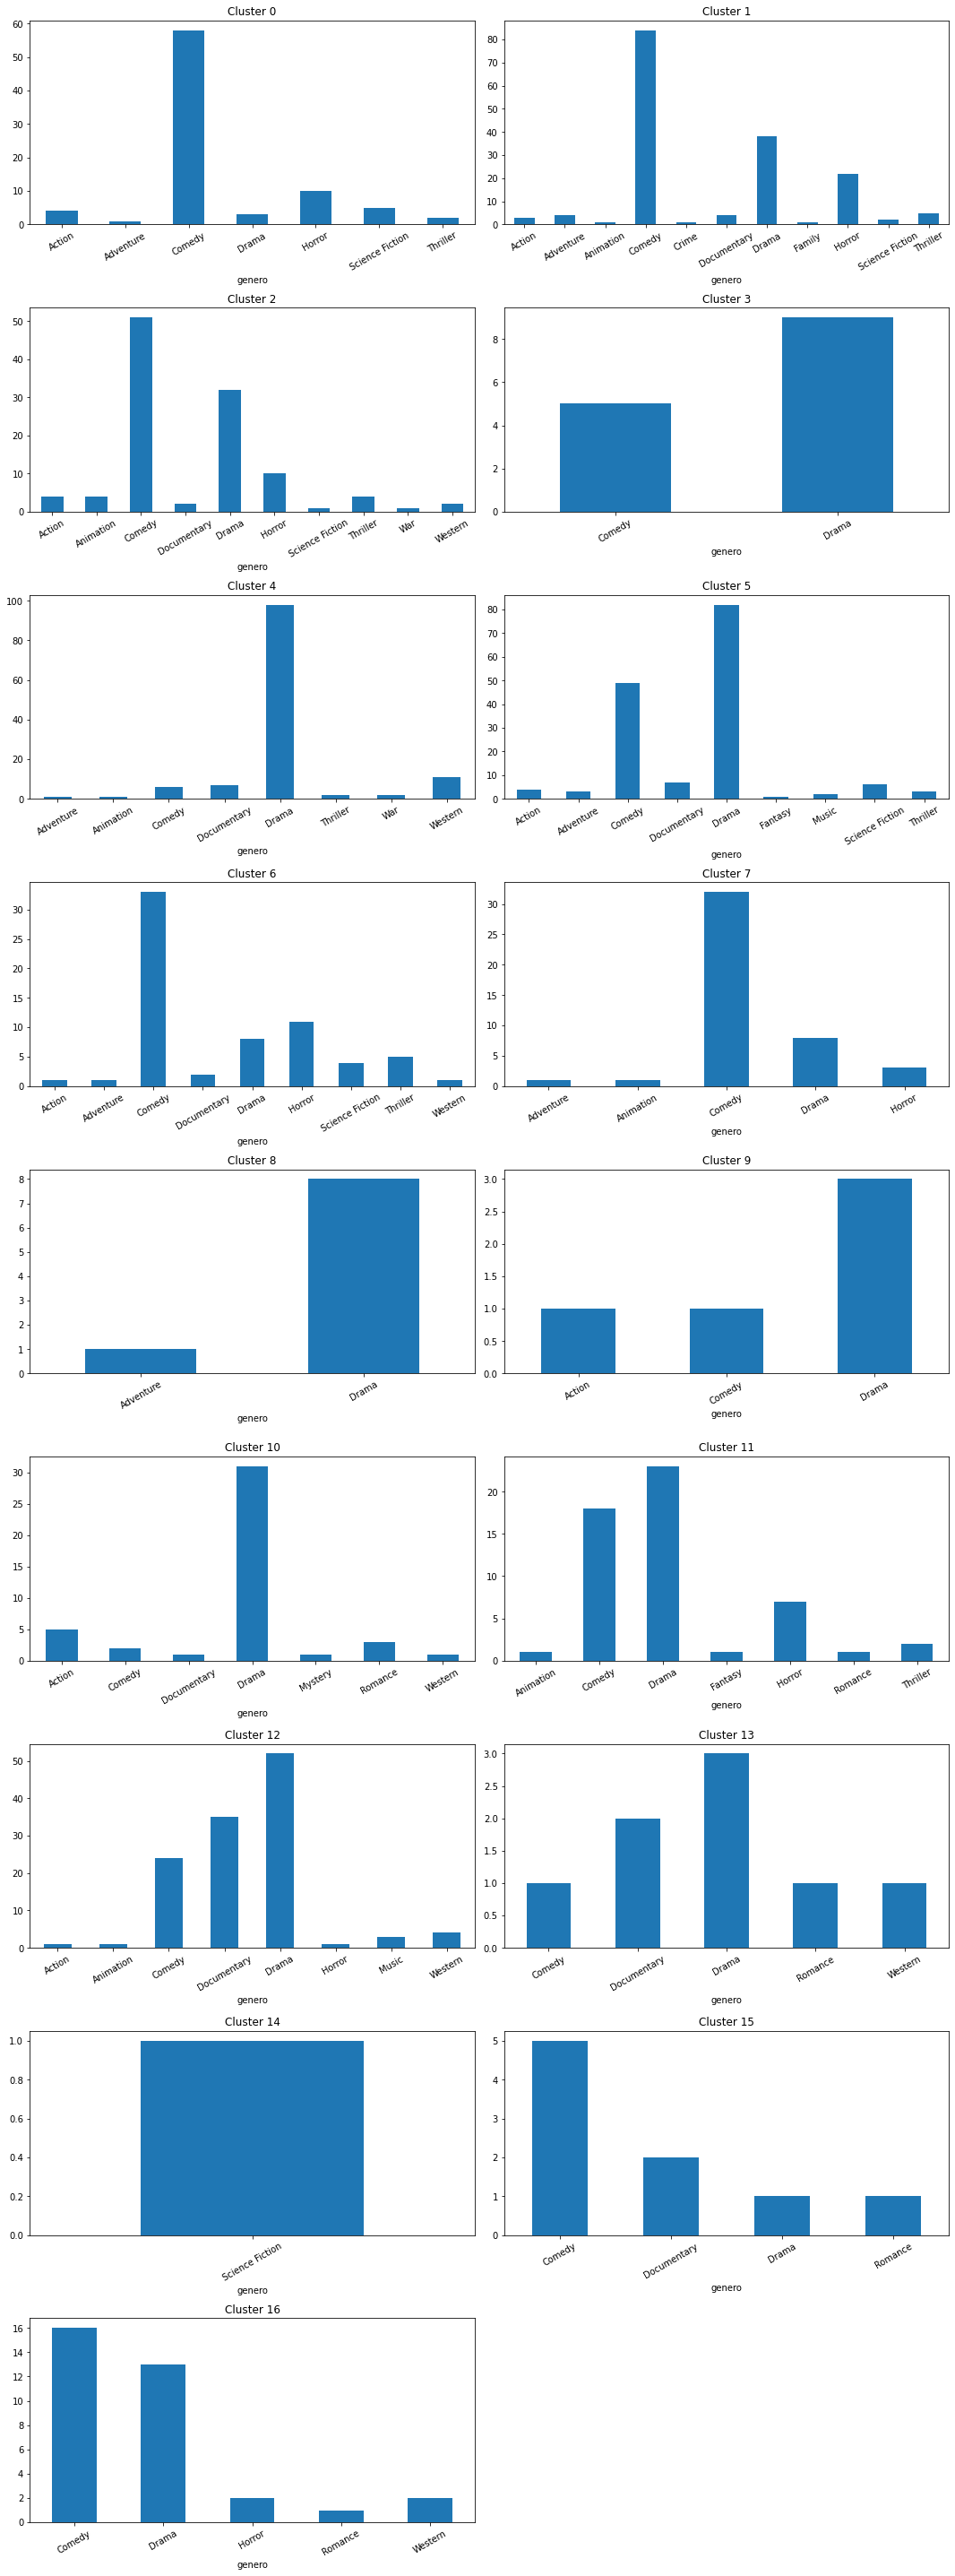

In [41]:
peliculas_analisis_num=peliculas_clasif_num.groupby(["cluster","genero"]).count()
fig, ax = plt.subplots(9, 2, figsize=(15,40))
for i in n_clusters_num:
    plt.subplot(9,2,i+1)
    pd.Series(peliculas_analisis_num.loc[i]["titulo"]).plot(kind="bar",title="Cluster {}".format(i))
    plt.xticks(rotation=30)
    fig.tight_layout(pad=1.0)
ax[8,1].remove()

Observamos cómo esta clasificación entrega clusters con menor número de generos en cada uno pero sigue sin ser capaz de categorizar de una manera precisa los generos de peliculas que necesitamos.

### Conclusiones

Hemos utilizado el modelo Kmeans para intentar predecir el género del listado de peliculas a partir de variables como lenguaje, ventas y duración entre otras.

Inicialmente hicimos una limpieza de los datos donde decidimos eliminar algunas columnas como presupuesto que contenian muchos datos NaN que podian interferir con la predicción que queriamos realizar. Otras como titulo que no aportaban para un análisis a través de kmeans para la prediccion del genero. Mientras que en otros datos como en ventas y pais eliminamos solo las filas que tenian datos NaN pasando de tener un dataframe de 1344 datos a uno de 1053.

Con estos datos hicimos un estudio a través de kmeans realizando previamente una codificación de los datos categoricos y una normalización de los datos numericos. A partir de esto y luego de entrenar el modelo obtuvimos los clusters que comparamos graficamente con las etiquetas reales y observamos que tuvimos una mala estimación de los targets a partir de los datos.

Finalmente intentamos mejorar el estudio eliminando las variables categoricas que a nuestro juicio no agregaban valor al modelo y procedimos a realizar nuevamente el entrenamiento obteniendo gráficamente que si bien era capaz de crear clusters con menos generos en cada una seguia siendo deficiente para los propositos que buscamos.

Como propuesta de mejora proponemos implementar el modelo Naive Bayes sobre la columna Titulo para intentar categorizar algunas palabras dentro de algun género y de esta manera intentar obtener mejores resultados en el contexto de que tenemos las etiquetas de genero de cada una de las peliculas.